# Lesson 5 - Solution Code

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf

bike_data = pd.read_csv('../../assets/dataset/bikeshare/bikeshare.csv')

## Part 2: Multiple Regression Analysis using citi bike data 

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

In [3]:
# print bike_data.head()
print( bike_data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


## Check 2. Multicollinearity
What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

## Students: 
using the code from the demo create a correlation heat map comparing 'temp', 'atemp', 'casual'

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


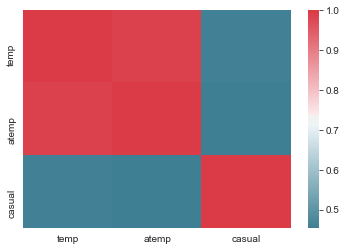

In [4]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print (correlations)
print (sns.heatmap(correlations, cmap=cmap))

#### Question: What did we find? 

Answer: 

#### The correlation matrix explains that:

- both temperature fields are moderately correlated to guest ridership;
- the two temperature fields are highly correlated to each other.


Including both of these fields in a model could introduce a pain point of multicollinearity, where it's more difficult for a model to determine which feature is effecting the predicted value.

### Demo: We can measure this effect in the coefficients:



#### Compare models (adj R2, coeffiecents, p-values)
1. temp
2. atemp 
3. temp and atemp
4. atemp and temp 

#### Model 1

In [5]:
lm = smf.ols(formula='casual ~ temp', data=bike_data).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     4654.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:47:23   Log-Likelihood:                -90341.
No. Observations:               17379   AIC:                         1.807e+05
Df Residuals:                   17377   BIC:                         1.807e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.8127      0.919    -24.811      0.000     -24.615     -21.011
temp         117.6871      1.725     68.220      0.000     114.306     121.068
==============================================================================
Omnibus:                     9350.244   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76239.218
Skew:                           2.491   Prob(JB):                         0.00
Kurtosis:                      11.970   Cond. No.                         6.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 2 

In [6]:
lm = smf.ols(formula='casual ~ atemp', data=bike_data).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     4514.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:47:25   Log-Likelihood:                -90397.
No. Observations:               17379   AIC:                         1.808e+05
Df Residuals:                   17377   BIC:                         1.808e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.3072      0.981    -26.818      0.000     -28.230     -24.384
atemp        130.2788      1.939     67.183      0.000     126.478     134.080
==============================================================================
Omnibus:                     9269.686   Durbin-Watson:                   0.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73728.368
Skew:                           2.474   Prob(JB):                         0.00
Kurtosis:                      11.794   Cond. No.                         7.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 3

In [7]:
lm = smf.ols(formula='casual ~ temp + atemp', data=bike_data).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     2327.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:47:26   Log-Likelihood:                -90341.
No. Observations:               17379   AIC:                         1.807e+05
Df Residuals:                   17376   BIC:                         1.807e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.8703      1.031    -22.191      0.000     -24.890     -20.850
temp         116.3402     11.021     10.556      0.000      94.738     137.942
atemp          1.5280     12.349      0.124      0.902     -22.677      25.733
==============================================================================
Omnibus:                     9349.145   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76211.691
Skew:                           2.491   Prob(JB):                         0.00
Kurtosis:                      11.968   Cond. No.                         60.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### What is the impact of including two highly correlated variables in our model?

Answer: 

###  Intrepretation: 
Even though the 2-variable model temp + atemp has a higher explanation of variance than two variables on their own, and both variables are considered significant (p values approaching 0), we can see that together, their coefficients are wildly different. 

This can introduce error in how we explain models.





## Guided Practice: Multicollinearity with dummy variables 



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

### Students: Now drop one

In [8]:
weather = pd.get_dummies(bike_data.weathersit)

In [10]:
weather.columns

Int64Index([1, 2, 3, 4], dtype='int64')

In [8]:
# all dummies in the model
lm_stats = smf.ols(formula='casual ~ weather[[1, 2, 3, 4]] ', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     103.9
Date:                Sun, 20 May 2018   Prob (F-statistic):           1.37e-87
Time:                        23:48:47   Log-Likelihood:                -92198.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -3.565e+13    4.6e+13     -0.774      0.439   -1.26e+14    5.46e+13
weather[[1, 2, 3, 4]][0]  3.565e+13    4.6e+13      0.774      0.439   -5.46e+13    1.26e+14
weather[[1, 2, 3, 4]][1]  3.565e+13    4.6e+13      0.774      0.439   -5.46e+13    1.26e+14
weather[[1, 2, 3, 4]][2]  3.565e+13    4.6e+13      0.774      0.439   -5.46e+13    1.26e+14
weather[[1, 2, 3, 4]][3]  3.565e+13    4.6e+13      0.774      0.439   -5.46e+13    1.26e+14
==============================================================================
Omnibus:                     8985.457   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58719.211
Skew:                           2.464   Prob(JB):                         0.00
Kurtosis:                      10.537   Cond. No.                     3.46e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
#droping one
lm_stats = smf.ols(formula='casual ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           8.08e-89
Time:                        21:51:22   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924     -52.478      57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178     -17.274      93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339     -28.235      82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635     -41.814      68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Describe the changes you observed.

Answer:

### Interpretation: 
This model makes more sense, because we can more easily explain the variables compared to the one we left out. 

For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. 

In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. 

However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.




In [12]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Working with Citibike data

We want to:
- Check for missing data 
- Id categorical variables
- Check frequencies and combine any categories that are too small 
- Create dummies
- Build a "full model" to predict casual ridership 

### Check for missing data

In [13]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Explore the data. What's the distribution of each of the variables? The frequencies? 

In [14]:
bike_data.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [15]:
bike_data["weathersit"].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

#### One of the categories has a tiny sample size, combine it with the next closest value

In [16]:
bike_data["weathersit"].replace(to_replace=4, value= 3, inplace= True)


In [17]:
bike_data["weathersit"].value_counts()

1    11413
2     4544
3     1422
Name: weathersit, dtype: int64

In [18]:
bike_data["hr"].value_counts()

16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64

In [19]:
bike_data["season"].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [20]:
temp = pd.get_dummies(bike_data["weathersit"], prefix = "weather")
temp.head()

weather_1  weather_2  weather_3
0          1          0          0
1          1          0          0
2          1          0          0
3          1          0          0
4          1          0          0

In [24]:
#Dummies example: 
weather = pd.get_dummies(bike_data["weathersit"], prefix = "weather")
#join those new variables back into the larger dataset
weather.drop(["weather_1"], axis=1, inplace=True )
bikemodel_data = bike_data.join(weather)
print (bikemodel_data.columns)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'weather_2', 'weather_3'],
      dtype='object')


               temp  weather_2  weather_3
temp       1.000000  -0.069657  -0.063361
weather_2 -0.069657   1.000000  -0.177621
weather_3 -0.063361  -0.177621   1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


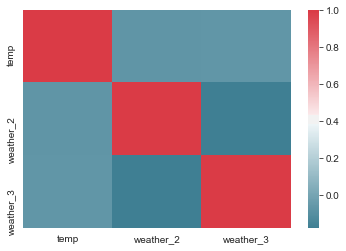

In [25]:
#Select columns to keep. 
columns_to_keep = ['temp', 'weather_2', 'weather_3']

#checking for colinearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikemodel_data[columns_to_keep].corr()# what are we getting the correlations of?
print (correlations)
print (sns.heatmap(correlations, cmap=cmap))





#### Create dummies for hour and season

In [28]:

hours = pd.get_dummies(bike_data["hr"], prefix= "hour")
hours.drop(["hour_0"], axis=1, inplace=True )
season = pd.get_dummies(bike_data["season"], prefix = "season")
season.drop(["season_1"], axis=1, inplace=True )


bikemodel_data = bike_data.join(weather) 
bikemodel_data = bikemodel_data.join(hours)
bikemodel_data = bikemodel_data.join(season)



### check for multicolinearity 

Index(['temp', 'hum', 'windspeed', 'weather_2', 'weather_3', 'holiday',
       'season_2', 'season_3', 'season_4', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23'],
      dtype='object')
AxesSubplot(0.125,0.125;0.62x0.755)


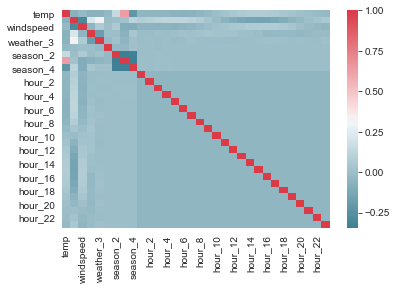

In [29]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

columns_to_keep = ['temp', 'hum', 'windspeed', 'weather_2', 'weather_3', 'holiday', 'season_2','season_3', 'season_4' ]
columns_to_keep.extend(['hour_' + str(i) for i in range(1, 24)])


correlations = bikemodel_data[columns_to_keep].corr()
# print correlations
print (bikemodel_data[columns_to_keep].columns)
print (sns.heatmap(correlations, cmap=cmap))


### Run a full model


In [23]:
lm_stats = smf.ols(formula='casual ~ temp + hum + windspeed + weather_2 + weather_3 + holiday + season_2 + season_3 + season_4 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_17 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', 
                   data=bikemodel_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     467.0
Date:                Sun, 20 May 2018   Prob (F-statistic):               0.00
Time:                        23:48:48   Log-Likelihood:                -87003.
No. Observations:               17379   AIC:                         1.741e+05
Df Residuals:                   17346   BIC:                         1.743e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.2755      2.059     -5.475      0.000     -15.312      -7.239
temp          84.8939      2.497     34.000      0.000      80.000      89.788
hum          -28.6258      1.906    -15.019      0.000     -32.362     -24.890
windspeed    -15.5955      2.417     -6.453      0.000     -20.332     -10.859
weather_2     -4.3093      0.679     -6.345      0.000      -5.641      -2.978
weather_3    -13.3866      1.144    -11.706      0.000     -15.628     -11.145
holiday       11.7361      1.644      7.140      0.000       8.514      14.958
season_2      12.7410      0.995     12.805      0.000      10.791      14.691
season_3       2.1639      1.285      1.684      0.092      -0.355       4.682
season_4       8.1553      0.861      9.472      0.000       6.468       9.843
hour_1        -2.6191      1.900     -1.378      0.168      -6.343       1.105
hour_2        -3.6566      1.907     -1.918      0.055      -7.394       0.081
hour_3        -5.2628      1.920     -2.741      0.006      -9.026      -1.499
hour_4        -5.7465      1.921     -2.991      0.003      -9.513      -1.980
hour_5        -4.7405      1.909     -2.484      0.013      -8.481      -1.000
hour_6        -1.3207      1.903     -0.694      0.488      -5.052       2.410
hour_7         4.9933      1.900      2.628      0.009       1.269       8.718
hour_8        13.5251      1.899      7.123      0.000       9.803      17.247
hour_9        19.9631      1.901     10.501      0.000      16.237      23.689
hour_10       32.2848      1.907     16.926      0.000      28.546      36.024
hour_11       42.1896      1.919     21.988      0.000      38.429      45.951
hour_12       48.7194      1.932     25.220      0.000      44.933      52.506
hour_13       50.7945      1.942     26.158      0.000      46.988      54.601
hour_14       52.8987      1.950     27.124      0.000      49.076      56.721
hour_15       51.8358      1.953     26.540      0.000      48.008      55.664
hour_16       51.0382      1.949     26.182      0.000      47.217      54.859
hour_17       52.9843      1.941     27.300      0.000      49.180      56.789
hour_18       41.4256      1.931     21.454      0.000      37.641      45.210
hour_19       31.1454      1.916     16.252      0.000      27.389      34.902
hour_20       20.5759      1.908     10.784      0.000      16.836      24.316
hour_21       14.2679      1.902      7.503      0.000      10.540      17.995
hour_22        9.7018      1.899      5.109      0.000       5.980      13.424
hour_23        4.1258      1.898      2.174      0.030       0.406       7.846
==============================================================================
Omnibus:                     9427.316   Durbin-Watson:                   0.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91265.199
Sk

#### Bonus: What would you next step be? 

Answer: 